# House Price Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('Datasets/Housing.csv')

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

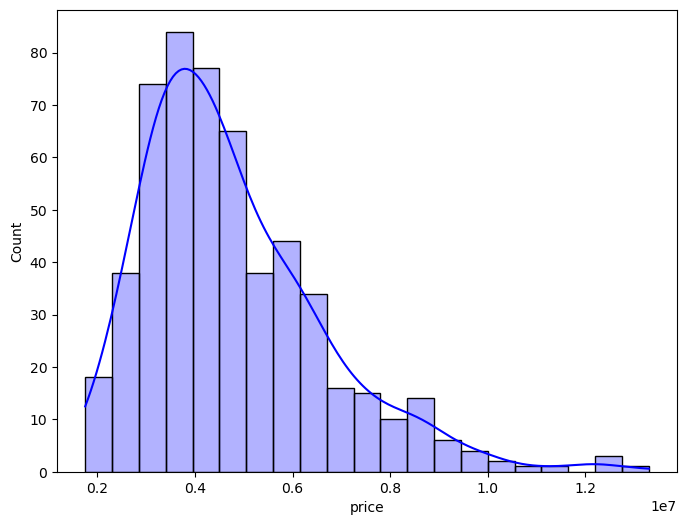

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['price'], kde = True, alpha=0.3, color="blue")

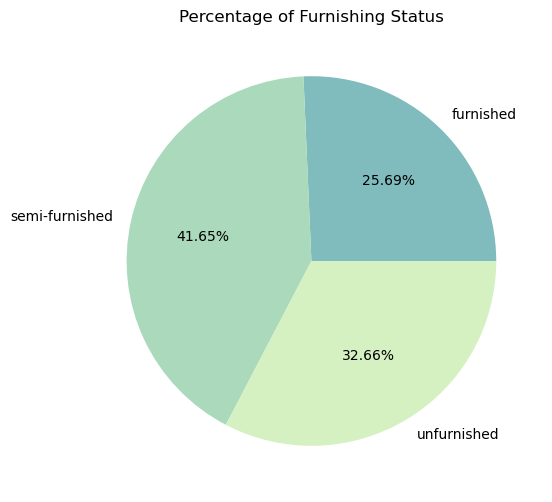

In [8]:
plt.figure(figsize=(8, 6))
furnish = df.groupby('furnishingstatus')['furnishingstatus'].count()
plt.pie(furnish, labels=furnish.index, autopct = "%.2f%%", colors=['#80BCBD', '#AAD9BB', '#D5F0C1', '#F9F7C9',"#77BFE2"])
plt.title('Percentage of Furnishing Status')
plt.show()

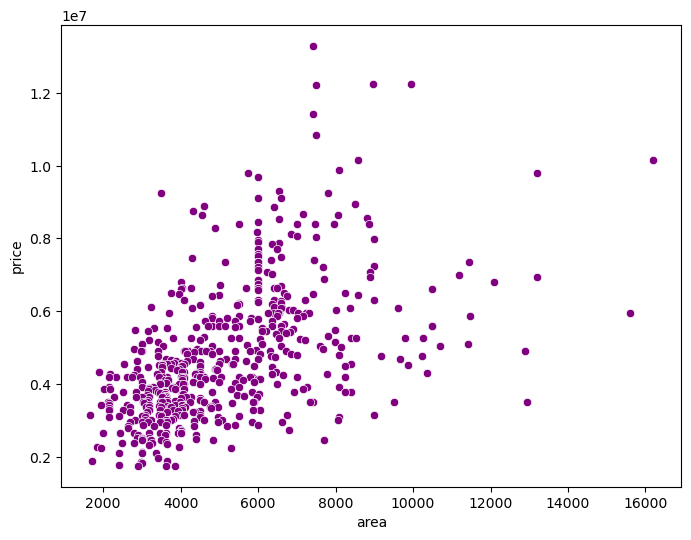

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="area", y="price", color = "purple", data=df)
plt.show()

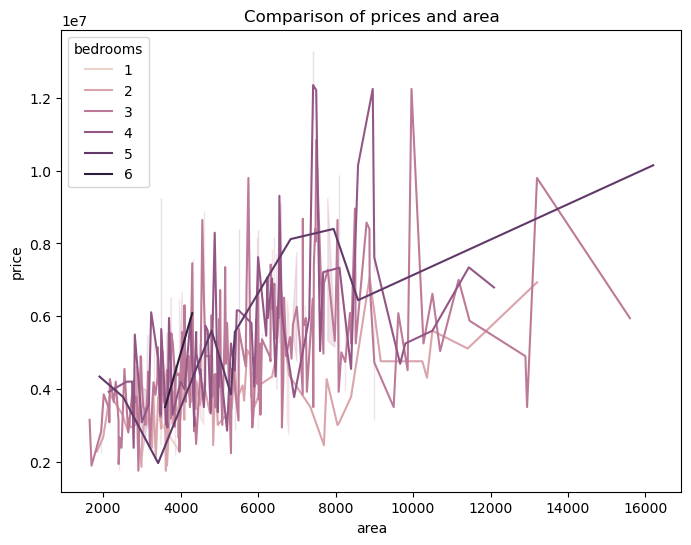

In [10]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="area", y="price",hue="bedrooms",data=df)
plt.title('Comparison of prices and area')
plt.show()

Text(0.5, 1.0, 'Comparison of prices and area')

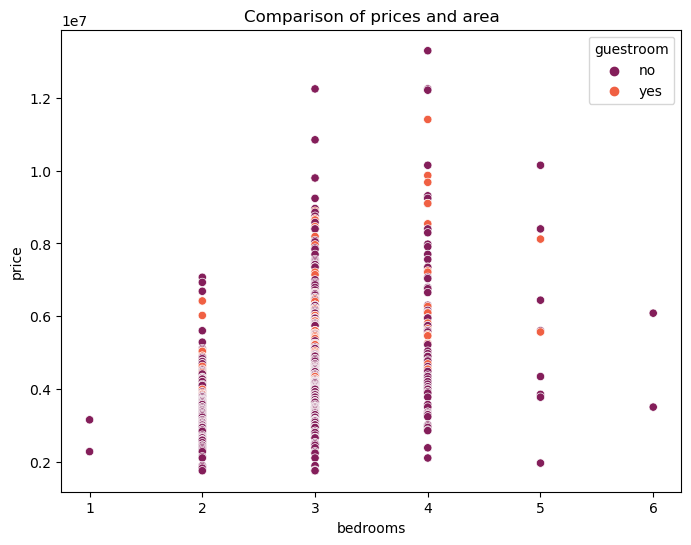

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="bedrooms", y="price", hue = "guestroom", palette="rocket", data=df)
plt.title('Comparison of prices and area')

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

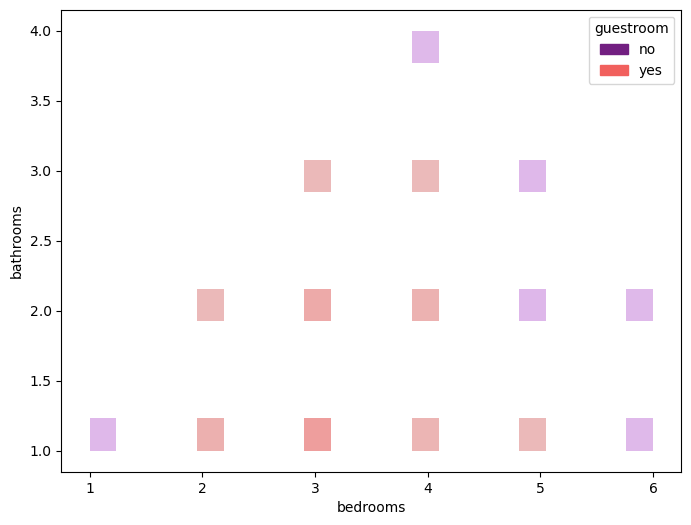

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot( x='bedrooms', y='bathrooms', hue="guestroom", palette="magma", data=df)

In [13]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
df.dropna(inplace = True)

In [15]:
string_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoder = OneHotEncoder(drop = 'first', sparse = False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[string_cols]),
columns = encoder.get_feature_names_out(string_cols))

C:\Users\suyas\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
stand_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
scaler_cols = pd.DataFrame(df[stand_cols])

In [17]:
x = pd.concat([encoded_cols, scaler_cols], axis =1)
y = df['price']

# Linear Regression

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 42)

In [19]:
model=LinearRegression(copy_X=True, fit_intercept=True)

In [20]:
model.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(x_test)

In [22]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Linear Regression")
print("R2 Score :", r2)
print("MAe :", mae)
print("MSE :", mse)
print("RMSE :", rmse)

Linear Regression
R2 Score : 0.6529242642153145
MAe : 970043.403920162
MSE : 1754318687330.6838
RMSE : 1324506.9600914463


In [23]:
LR = {'actual':y_test, 'prediction':y_pred}
pd.DataFrame(data=LR)

,actual,prediction
316,4060000,5.164654e+06
77,6650000,7.224722e+06
360,3710000,3.109863e+06
90,6440000,4.612075e+06
493,2800000,3.294646e+06
...,...,...
15,9100000,4.973331e+06
357,3773000,4.336651e+06
39,7910000,7.059063e+06
54,7350000,6.398941e+06


In [24]:
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False] }

In [25]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [26]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True}


In [27]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=4, scoring='neg_mean_squared_error', cv=5, random_state=42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=4,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error')

In [28]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'fit_intercept': True, 'copy_X': True}


# lasso


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 42)

In [30]:
lasso_model = Lasso(alpha=0.001, tol= 0.01)

In [31]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.001, tol=0.01)

In [32]:
y_pred = lasso_model.predict(x_test)

In [33]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Lasso Regression")
print("R2 Score :", r2)
print("MAe :", mae)
print("MSE :", mse)
print("RMSE :", rmse)

Lasso Regression
R2 Score : 0.6529242637037251
MAe : 970043.4043527072
MSE : 1754318689916.5479
RMSE : 1324506.9610676072


In [34]:
LS = {'actual':y_test, 'prediction':y_pred}
pd.DataFrame(data=LS)

,actual,prediction
316,4060000,5.164654e+06
77,6650000,7.224722e+06
360,3710000,3.109863e+06
90,6440000,4.612075e+06
493,2800000,3.294646e+06
...,...,...
15,9100000,4.973331e+06
357,3773000,4.336651e+06
39,7910000,7.059063e+06
54,7350000,6.398941e+06


In [35]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1], 'fit_intercept': [True, False],'tol': [0.0001, 0.001, 0.01],}

In [36]:
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.001, tol=0.01),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'fit_intercept': [True, False],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_squared_error')

In [37]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'alpha': 0.001, 'fit_intercept': True, 'tol': 0.01}


In [38]:
random_search = RandomizedSearchCV(estimator=lasso_model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(alpha=0.001, tol=0.01),
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1],
                                        'fit_intercept': [True, False],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=42, scoring='neg_mean_squared_error')

In [39]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'tol': 0.001, 'fit_intercept': True, 'alpha': 0.001}


# Ridge Regression model

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 42)

In [41]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(x_train, y_train)

Ridge(alpha=1)

In [42]:
y_pred = ridge_model.predict(x_test)

In [43]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Ridge Regression")
print("R2 Score :", r2)
print("MAe :", mae)
print("MSE :", mse)
print("RMSE :", rmse)

Ridge Regression
R2 Score : 0.6524978002155011
MAe : 970245.6821765773
MSE : 1756474279575.2844
RMSE : 1325320.4441097574


In [44]:
RR = {'actual':y_test, 'prediction':y_pred}
pd.DataFrame(data=RR)

,actual,prediction
316,4060000,5.173868e+06
77,6650000,7.203148e+06
360,3710000,3.112871e+06
90,6440000,4.611232e+06
493,2800000,3.296686e+06
...,...,...
15,9100000,4.990788e+06
357,3773000,4.354613e+06
39,7910000,7.056134e+06
54,7350000,6.388485e+06


In [45]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1]}

In [46]:
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=1),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [47]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'alpha': 1}


In [48]:
random_search = RandomizedSearchCV(estimator=ridge_model, param_distributions=param_grid, n_iter=4, scoring='neg_mean_squared_error', cv=5, random_state=42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(alpha=1), n_iter=4,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1]},
                   random_state=42, scoring='neg_mean_squared_error')

In [49]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'alpha': 1}


# Elastic Net Regression

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

In [51]:
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.3)
elastic_net_model.fit(x_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.3)

In [52]:
y_pred = elastic_net_model.predict(x_test)

In [60]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Elastic Net Regression")
print("R2 Score :", r2)
print("MAe :", mae)
print("MSE :", mse)
print("RMSE :", rmse)

Elastic Net Regression
R2 Score : 0.5962533240453316
MAe : 879508.6354113376
MSE : 1406938106079.4094
RMSE : 1186144.2180778058


In [54]:
EN = {'actual':y_test, 'prediction':y_pred}
pd.DataFrame(data=EN)

,actual,prediction
316,4060000,5.720091e+06
77,6650000,6.236164e+06
360,3710000,3.420850e+06
90,6440000,4.360654e+06
493,2800000,3.549190e+06
...,...,...
138,5740000,4.637513e+06
62,7070000,6.267893e+06
135,5775000,5.701976e+06
128,5873000,5.742003e+06


In [55]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

In [56]:
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1, l1_ratio=0.3),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error')

In [57]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.3}


In [58]:
random_search = RandomizedSearchCV(estimator=elastic_net_model, param_distributions=param_grid, n_iter=4, scoring='neg_mean_squared_error', cv=5, random_state=42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(alpha=0.1, l1_ratio=0.3),
                   n_iter=4,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1],
                                        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
                   random_state=42, scoring='neg_mean_squared_error')

In [59]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'l1_ratio': 0.1, 'alpha': 0.001}
